In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as ss

# from spe.data_generation import create_clus_split

In [251]:
def create_clus_split(
    nx,
    ny,
    tr_frac,
    ngrid=5,
):
#     xv, yv = np.meshgrid(np.arange(nx), np.arange(ny))
#     pts = np.stack([xv.ravel(), yv.ravel()]).T
    n = nx * ny
#     print("pts", pts)

    cxv, cyv = np.meshgrid(np.arange(ngrid), np.arange(ngrid))
    cpts = np.stack([cxv.ravel(), cyv.ravel()]).T
    # selected_grids = cpts[ctr_idx,:]
#     print(">>>>>>>>>>")
#     print("cpts", cpts)

    incrx = int(nx / ngrid)
    incry = int(ny / ngrid)
    nsq = ngrid**2
    grids = []
    corners = []
    for cpt in cpts:
        gxv, gyv = np.meshgrid(
            cpt[0] * incrx + np.arange(incrx), cpt[1] * incry + np.arange(incry)
        )
        corners.append([cpt[0] * incrx, cpt[1] * incry])
        grids.append([(x, y) for (x, y) in zip(gxv.ravel(), gyv.ravel())])
    grids = np.array(grids)
#     print("grids", grids)
    
    corners = np.vstack(corners)
#     plt.scatter(corners[:,0], corners[:,1])

    print(nsq, int(tr_frac * nsq * 20))

    n_centers = np.minimum(nsq, int(tr_frac * nsq *20))
#     n_centers = np.minimum(nsq, int(tr_frac * nsq * 2))
    grid_idx = np.random.choice(nsq, size=n_centers, replace=False)
    sel_grids = grids[grid_idx]
#     print("sel_grids", sel_grids)

    tr_idx = []
    print(n, n_centers, incrx, incry)
    sample_frac = n * tr_frac / (n_centers * incrx * incry)
    print(sample_frac)
    print("----------")
    for g in sel_grids:
#         print(g)
#         print(len(g), int(len(g) * sample_frac))
#         print(g[np.random.choice(len(g), size=int(len(g) * sample_frac), replace=False)])
#         print("~~~~~~~~~~")
        tr_idx.append(
            g[np.random.choice(len(g), size=int(len(g) * sample_frac), replace=False)]
        )

    tr_idx = np.vstack(tr_idx)
    
    plt.scatter(tr_idx[:,0], tr_idx[:,1], s=.1)

    tr_idx = np.ravel_multi_index(tr_idx.T, (nx, ny))

    tr_bool = np.zeros(n).astype(bool)
    tr_bool[tr_idx] = True

    return tr_idx, tr_bool

In [252]:
x = np.arange(-10, 11)
xU, xL = x + 0.5, x - 0.5 
prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
prob = prob / prob.sum() # normalize the probabilities so their sum is 1
nums = np.random.choice(x, size = 10000, p = prob)
plt.hist(nums, bins = len(x))

(array([   6.,   15.,   38.,   85.,  192.,  365.,  516.,  813., 1019.,
        1229., 1342., 1282., 1065.,  794.,  553.,  366.,  181.,   88.,
          35.,   12.,    4.]),
 array([-10.        ,  -9.04761905,  -8.0952381 ,  -7.14285714,
         -6.19047619,  -5.23809524,  -4.28571429,  -3.33333333,
         -2.38095238,  -1.42857143,  -0.47619048,   0.47619048,
          1.42857143,   2.38095238,   3.33333333,   4.28571429,
          5.23809524,   6.19047619,   7.14285714,   8.0952381 ,
          9.04761905,  10.        ]),
 <BarContainer object of 21 artists>)

In [253]:
## discretize normal with multinom
x = np.arange(-10, 11)
xv, yv = np.meshgrid(x,x)
xf = xv.ravel()
yf = yv.ravel()
xU, xL = xf + .5, xf - .5
yU, yL = yf + .5, yf - .5

In [254]:
multi_prob = (
    (ss.norm.cdf(xU, scale = 4) - ss.norm.cdf(xL, scale = 4))
    * (ss.norm.cdf(yU, scale = 4) - ss.norm.cdf(yL, scale = 4))
)
multi_prob /= multi_prob.sum()
# normalize the probabilities so their sum is 1
idxs = np.random.choice(len(xf), size = 1000000, p = multi_prob)
xs = xf[idxs]
ys = yf[idxs]

<IPython.core.display.Javascript object>


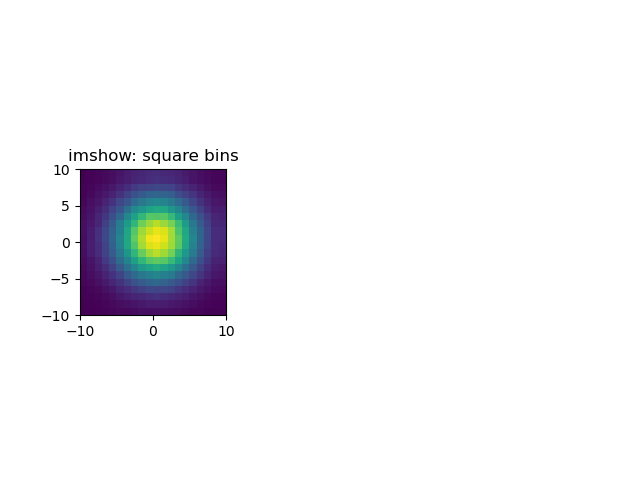

In [255]:
H, xedges, yedges = np.histogram2d(xs, ys, bins=20)

fig = plt.figure()#figsize=(7, 3))
ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

In [257]:
def discrete_distr(cx, cy, xmax, ymax, frac):
    x = np.arange(np.maximum(0,cx-40), np.minimum(xmax,cx+41))
    y = np.arange(np.maximum(0,cy-40), np.minimum(ymax,cy+41))
#     print(x)
#     print(y)
    xv, yv = np.meshgrid(x,y)
#     print(xv.shape)
    xf = xv.ravel()
    yf = yv.ravel()
    xU, xL = xf + .5, xf - .5
    yU, yL = yf + .5, yf - .5
    
    xscale = xmax**.7
    yscale = ymax **.7
    
    multi_prob = (
        (ss.norm.cdf(xU - cx, scale = xscale) - ss.norm.cdf(xL - cx, scale = xscale))
        * (ss.norm.cdf(yU - cy, scale = yscale) - ss.norm.cdf(yL - cy, scale = yscale))
    )
    multi_prob /= multi_prob.sum()
    # normalize the probabilities so their sum is 1
#     print(len(xf))
    idxs = np.random.choice(len(xf), size = int(frac*len(xf)), p = multi_prob, replace=False)
    xs = xf[idxs]
    ys = yf[idxs]

    return xs, ys

In [258]:
def plot_samples(xs, ys):
    H, xedges, yedges = np.histogram2d(xs, ys, bins=np.arange(np.amin(xs), np.amax(xs)))

    fig = plt.figure()#figsize=(7, 3))
#     ax = fig.add_subplot(131, title='imshow: square bins')
    plt.imshow(H, interpolation='nearest', origin='lower',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

<IPython.core.display.Javascript object>


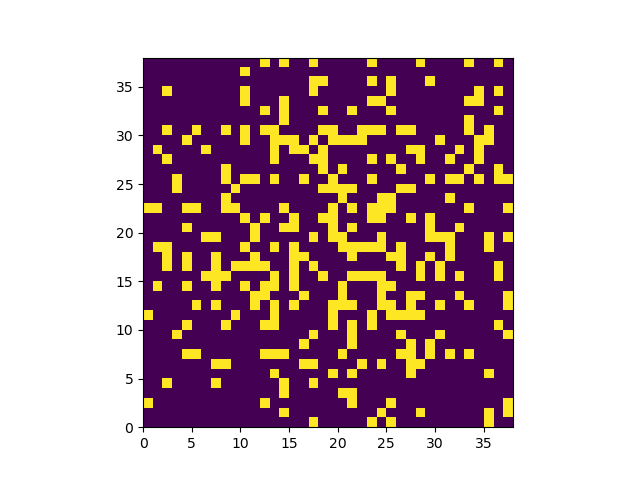

In [259]:
xs, ys = discrete_distr(20, 20, 40, 40, .2)
plot_samples(xs, ys)

In [260]:
def new_create_clus_split(
    nx,
    ny,
    tr_frac,
    n_centers=50,
):
    xv, yv = np.meshgrid(np.arange(nx), np.arange(ny))
    pts = np.stack([xv.ravel(), yv.ravel()]).T
    n = nx * ny
#     print("pts", pts)

    
    ctr_idx = np.random.choice(n, size=n_centers, replace=False)
    cpts = pts[ctr_idx,:]
    tr_idx = []
    for ctr in cpts:
#         print(g)
#         print(len(g), int(len(g) * sample_frac))
#         print(g[np.random.choice(len(g), size=int(len(g) * sample_frac), replace=False)])
#         print("~~~~~~~~~~")
        
        xs, ys = discrete_distr(ctr[0], ctr[1], nx, ny, frac=tr_frac*n/(81*81*n_centers),)
        cluster = [pt for pt in zip(xs,ys)]
        tr_idx.append(
            cluster
        )

    tr_idx = np.vstack(tr_idx)
    
    plt.scatter(tr_idx[:,0], tr_idx[:,1], s=.1)

    tr_idx = np.ravel_multi_index(tr_idx.T, (nx, ny))

    tr_bool = np.zeros(n).astype(bool)
    tr_bool[tr_idx] = True

    return tr_idx, tr_bool

In [261]:
%matplotlib notebook

400 8
861184 8 46 46
0.05087334593572779
----------


<IPython.core.display.Javascript object>


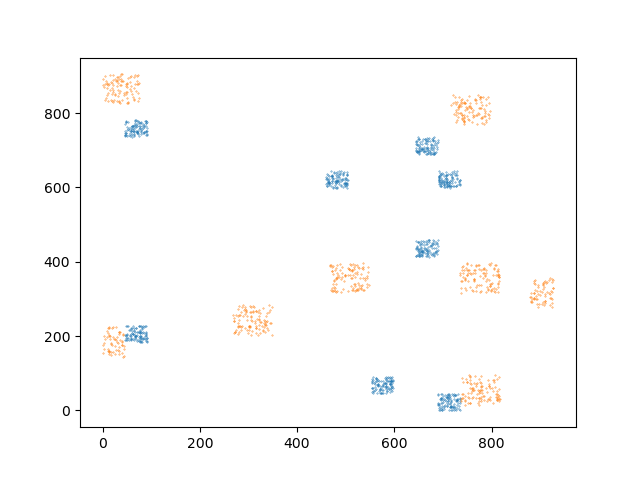

0.0009939803804994054

In [263]:
# n = 928*1642
tr_frac = .001
ngrid=20
tr_idx, tr_bool = create_clus_split(
                        928, 928, tr_frac, ngrid=ngrid
                    )
# tr_idx, tr_bool = new_create_clus_split(
#                         928, 928, tr_frac, n_centers=40
#                     )
tr_bool.mean()

In [264]:
tr_idx, tr_bool = new_create_clus_split(
                        928, 928, tr_frac, n_centers=8
                    )
tr_bool.mean()

0.0008825059453032105

In [155]:
%debug

> /var/folders/6f/_l6d5fqj12zg60thjgmbdc5r0000gn/T/ipykernel_19008/2138732306.py(30)new_create_clus_split()
     28     tr_idx = np.vstack(tr_idx)
     29 
---> 30     plt.scatter(tr_idx[:,0], tr_idx[:,1], s=.1)
     31 
     32     tr_idx = np.ravel_multi_index(tr_idx.T, (nx, ny))

ipdb> tr_idx
array([[<zip object at 0x7fed042cd240>],
       [<zip object at 0x7fed042d9e40>]], dtype=object)
ipdb> quit


In [79]:
tr_idx

array([ 44, 434, 341, 272, 215, 422, 159, 362, 334, 192,   5, 181, 160,
       184,  12, 242,  13, 426,   3,  38, 303, 162, 154, 283, 156,  94,
       161, 394,  73, 121,  71, 307, 306, 191, 392,  35, 399, 275, 129,
       302, 183, 300, 101, 100, 420, 335, 128, 212, 397, 344,  72, 402,
       246, 213, 282, 369, 122, 340,  39,  40, 182,   1, 120, 366, 273,
       373, 396, 374,   8, 339, 210, 219, 157, 251, 274,  98, 240, 277,
       279, 163,  92,  90,  64, 429, 186,  61, 218, 123,  34,  30, 187,
       284, 216, 220, 310,  99, 224, 433, 278, 421,   2, 193, 336,  42,
       217, 127, 312, 333, 222, 428,  95, 189, 371, 248, 367,  63, 190,
       431, 304, 188, 390, 214, 343, 365, 254, 364,   6, 103, 395, 245,
        67, 360,  70, 342, 330, 155, 158,  66, 280, 270, 281, 243, 249,
       313,  14,  93, 311,  60, 338,  10,  65,   0, 424, 185, 372, 194,
       131,  74, 244, 247, 361, 301,  43, 404, 398, 180,  91, 151,   9,
        97, 271, 400, 104,  96, 363,  36, 153,   4, 134, 250, 79

In [80]:
tr_bool

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False, False,  True,  True, False, False, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
       False,  True,

In [81]:
tr_bool.mean()

0.8